# Multiple Linear Regression:

It is the basic and commonly used type for predictive analysis. It is a statistical approach to modeling the relationship between a dependent variable and a given set of independent variables.

These are of two types:
1. Simple linear Regression
2. Multiple Linear Regression

Multiple Linear Regression attempts to model the relationship between two or more features and a response by fitting a linear equation to observed data. The steps to perform multiple linear Regression are almost similar to that of simple linear Regression. The Difference Lies in the evaluation. We can use it to find out which factor has the highest impact on the predicted output and how different variables relate to each other.


    Here : Y = b0 + b1 * x1 + b2 * x2 + b3 * x3 + …… bn * xn
    Y = Dependent variable and x1, x2, x3, …… xn = multiple independent variables

## Assumption of Regression Model : 

* Linearity: The relationship between dependent and independent variables should be linear.
* Homoscedasticity: Constant variance of the errors should be maintained.
* Multivariate normality: Multiple Regression assumes that the residuals are normally distributed.
* Lack of Multicollinearity: It is assumed that there is little or no multicollinearity in the data.

## Dummy Variable:

As we know in the Multiple Regression Model we use a lot of categorical data. Using Categorical Data is a good method to include non-numeric data into the respective Regression Model. Categorical Data refers to data values that represent categories-data values with the fixed and unordered number of values, for instance, gender(male/female). In the regression model, these values can be represented by Dummy Variables. 
These variables consist of values such as 0 or 1 representing the presence and absence of categorical values. 

![](https://media.geeksforgeeks.org/wp-content/uploads/reg1-1.png)

## Dummy Variable Trap:
The Dummy Variable Trap is a condition in which two or more are Highly Correlated. In the simple term, we can say that one variable can be predicted from the prediction of the other. The solution of the Dummy Variable Trap is to drop one of the categorical variables. So if there are m Dummy variables then m-1 variables are used in the model. 

    D2 = D1-1   
    Here D2, D1 = Dummy Variables

### Method of Building Models : 

- All-in
- Backward-Elimination
- Forward Selection
- Bidirectional Elimination
- Score Comparison

### Backward-Elimination :
- Step 1: Select a significant level to start in the model.
- Step 2: Fit the full model with all possible predictors.
- Step 3: Consider the predictor with the highest P-value. If P > SL go to STEP 4, otherwise the model is Ready.
- Step 4: Remove the predictor.
- Step 5: Fit the model without this variable.

### Forward-Selection :
- Step 1 : Select a significance level to enter the model(e.g. SL = 0.05)
- Step 2: Fit all simple regression models y~ x(n). Select the one with the lowest P-value.
- Step 3: Keep this variable and fit all possible models with one extra predictor added to the one(s) you already have.
- Step 4: Consider the predictor with the lowest P-value. If P < SL, go to Step #3, otherwise the model is Ready.

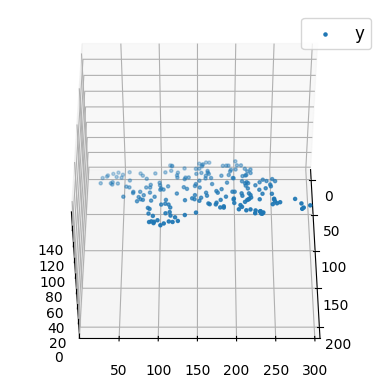

In [3]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def generate_dataset(n):
	x = []
	y = []
	random_x1 = np.random.rand()
	random_x2 = np.random.rand()
	for i in range(n):
		x1 = i
		x2 = i/2 + np.random.rand()*n
		x.append([1, x1, x2])
		y.append(random_x1 * x1 + random_x2 * x2 + 1)
	return np.array(x), np.array(y)

x, y = generate_dataset(200)

mpl.rcParams['legend.fontsize'] = 12

fig = plt.figure()
ax = fig.add_subplot(projection ='3d')

ax.scatter(x[:, 1], x[:, 2], y, label ='y', s = 5)
ax.legend()
ax.view_init(45, 0)

plt.show()


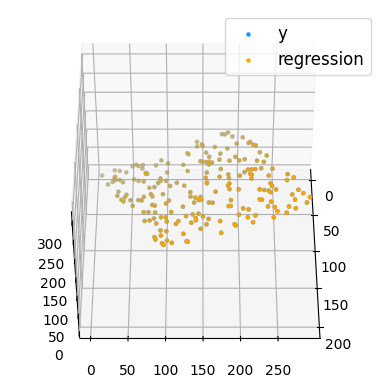

In [2]:
def mse(coef, x, y):
	return np.mean((np.dot(x, coef) - y)**2)/2


def gradients(coef, x, y):
	return np.mean(x.transpose()*(np.dot(x, coef) - y), axis=1)


def multilinear_regression(coef, x, y, lr, b1=0.9, b2=0.999, epsilon=1e-8):
	prev_error = 0
	m_coef = np.zeros(coef.shape)
	v_coef = np.zeros(coef.shape)
	moment_m_coef = np.zeros(coef.shape)
	moment_v_coef = np.zeros(coef.shape)
	t = 0

	while True:
		error = mse(coef, x, y)
		if abs(error - prev_error) <= epsilon:
			break
		prev_error = error
		grad = gradients(coef, x, y)
		t += 1
		m_coef = b1 * m_coef + (1-b1)*grad
		v_coef = b2 * v_coef + (1-b2)*grad**2
		moment_m_coef = m_coef / (1-b1**t)
		moment_v_coef = v_coef / (1-b2**t)

		delta = ((lr / moment_v_coef**0.5 + 1e-8) *
				(b1 * moment_m_coef + (1-b1)*grad/(1-b1**t)))

		coef = np.subtract(coef, delta)
	return coef


coef = np.array([0, 0, 0])
c = multilinear_regression(coef, x, y, 1e-1)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x[:, 1], x[:, 2], y, label='y',
		s=5, color="dodgerblue")

ax.scatter(x[:, 1], x[:, 2], c[0] + c[1]*x[:, 1] + c[2]*x[:, 2],
		label='regression', s=5, color="orange")

ax.view_init(45, 0)
ax.legend()
plt.show()
